##Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Read data sets

In [ ]:
df1=pd.read_excel("/content/drive/MyDrive/QVI_transaction_data.xlsx")
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/QVI_purchase_behaviour.csv")
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


##Check Duplicates

In [ ]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())


0
0


##Remove Duplicates

In [ ]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)


## Extract Pack Size and Brand Name

We extract the pack size (grams) from the PROD_NAME column:

In [ ]:
df1['PACK_SIZE'] = df1['PROD_NAME'].str.extract(r'(\d+)').astype(int)


In [ ]:
df1['BRAND_NAME'] = df1['PROD_NAME'].str.split().str[0]


### Merge Transaction Data with Customer Data

Merge df1 (transaction data) with df2 (customer purchase behavior) on LYLTY_CARD_NBR:


In [ ]:
df = df1.merge(df2, on="LYLTY_CARD_NBR", how="left")
df


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [ ]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   PACK_SIZE         264835 non-null  int64  
 9   BRAND_NAME        264835 non-null  object 
 10  LIFESTAGE         264835 non-null  object 
 11  PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 24.2+ MB


##Check DF Duplicates

In [ ]:
df.duplicated().sum()

0

##Finding Missing Values

In [ ]:
df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND_NAME,0


## Finding Outliers using  z-score method

In [ ]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = df.select_dtypes(include=['number']).apply(zscore)

# Set threshold (common: ±3)
outliers = (z_scores.abs() > 3).sum()

print("Number of Outliers per Feature:\n", outliers)


Number of Outliers per Feature:
 DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR      44
TXN_ID               1
PROD_NBR             0
PROD_QTY           849
TOT_SALES          439
PACK_SIZE         6418
dtype: int64


## Imputing outliers using with winsorize method

In [ ]:
from scipy.stats.mstats import winsorize

# Apply Winsorization
for col in ["LYLTY_CARD_NBR","PROD_QTY","TXN_ID","TOT_SALES","PACK_SIZE"]:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Cap extreme 5%

In [ ]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = df.select_dtypes(include=['number']).apply(zscore)

# Set threshold (common: ±3)
outliers = (z_scores.abs() > 3).sum()

print("Number of Outliers per Feature:\n", outliers)


Number of Outliers per Feature:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
dtype: int64


# Exploratory Data Analysis (EDA)

Customer Segmentation Analysis
1. Top Spending Customer Segments

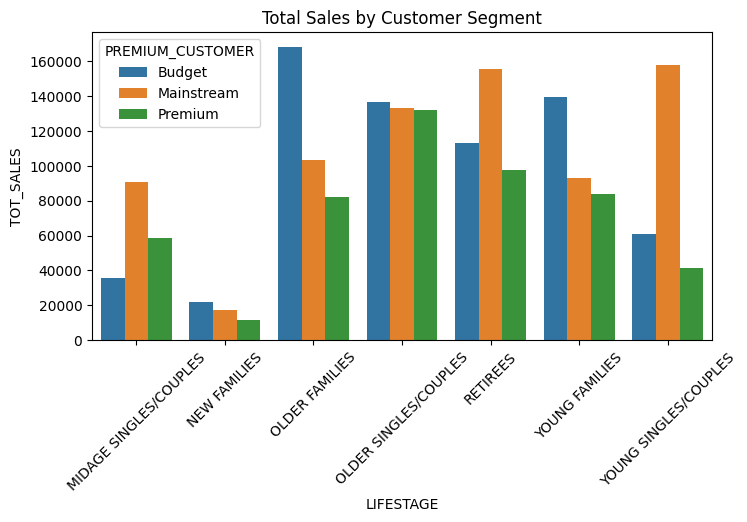

In [ ]:
customer_spending = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=customer_spending, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.title("Total Sales by Customer Segment")
plt.show()


# Insights from the Chart:

  1.Older Families & Older Singles/Couples are major contributors:

 The highest total sales come from Older Families and Older Singles/Couples. The Budgetsegment dominates Older Families, while all segments contribute almost equally to Older Singles/Couples.

2. Young Families & Retirees show significant spending:

 Retirees have high spending, with the Mainstream segment leading. Young Families also contribute significantly, with Mainstream customers spending the most.

3. Midage Singles/Couples & Young Singles/Couples have lower spending:

 These segments contribute relatively less in total sales. Among them,# Mainstream customers spend the most, while Premium customers spend the least.

4. Budget segment dominates in some categories:
Particularly in Older Families,the Budget segment has a much higher total sales value compared to the other two segments.

5.Premium customers are not the top spenders in most cases:

Premium customers have lower spending than Mainstream customers across most categories. They contribute the least in "Young Singles/Couples" and "New Families." %% Set colorblind-friendly palette

## 2. Most Popular Brands

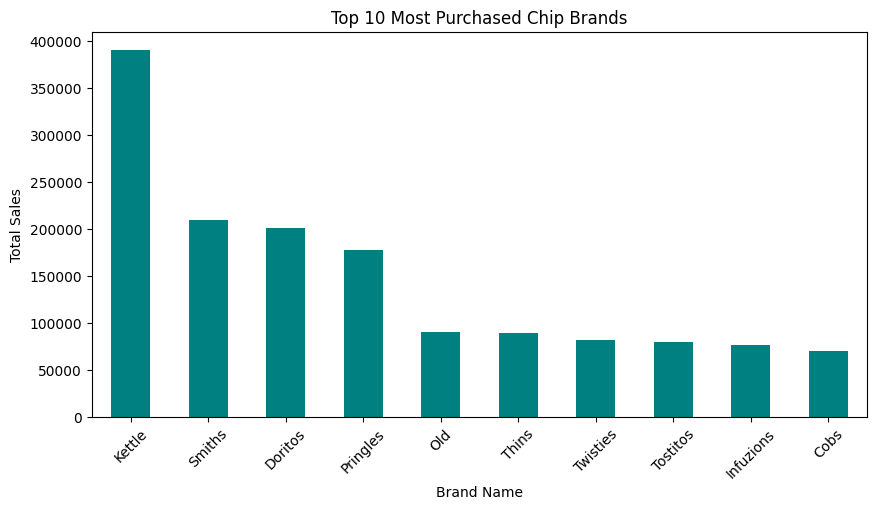

In [ ]:
top_brands = df.groupby("BRAND_NAME")["TOT_SALES"].sum().nlargest(10)

plt.figure(figsize=(8,4))
top_brands.plot(kind='bar', color='teal')
plt.title("Top 10 Most Purchased Chip Brands")
plt.xlabel("Brand Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


## Insights based on Bar Chart:

1. Dominance of "Kettle" Brand
"Kettle" chips have significantly higher sales compared to all other brands.
This suggests strong brand preference, better marketing, or superior product quality.
2. Mid-Tier Brands: Smiths, Doritos, Pringles
These three brands have relatively close sales figures, but far lower than Kettle.
They still maintain a strong market share among chip buyers.
3. Lower-Tier Brands: Old, Thins, Twisties, Tostitos, Infuzions, Cobs
These brands have much lower sales, suggesting they are either:
Niche products with a specific audience.
Less popular compared to leading brands.
Limited distribution or brand recognition.
4. Sales Gap Between Top and Bottom Brands
The difference between "Kettle" and "Cobs" is huge, showing that a few brands dominate the market.
The bottom-tier brands have similar sales figures, indicating market saturation or shared customer preference.



### 3. Preferred Pack Sizes

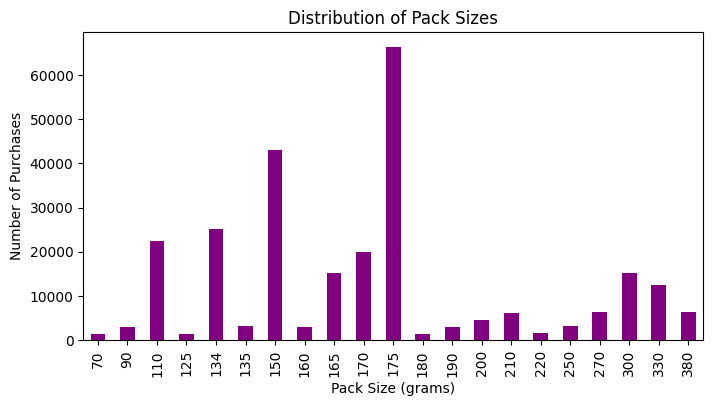

In [ ]:
pack_size_counts = df['PACK_SIZE'].value_counts().sort_index()

plt.figure(figsize=(8,4))
pack_size_counts.plot(kind='bar', color='purple')
plt.title("Distribution of Pack Sizes")
plt.xlabel("Pack Size (grams)")
plt.ylabel("Number of Purchases")
plt.show()


##Insights:
1. Most Popular Pack Size
The 175g pack has the highest number of purchases, indicating it is the most preferred size among customers.
This could be due to affordability, convenience, or standard packaging size for sharing.

2. Other Popular Pack Sizes
The 150g pack also has high sales, suggesting it is another widely accepted size.
The 110g, 135g, 170g, and 300g packs also have moderate sales, showing a preference for mid-sized packs.

3. Less Popular Pack Sizes
Smaller sizes like 70g, 90g, and 125g have relatively low purchases, indicating they may be:
Too small for customer needs (e.g., single-serve but not cost-effective).
Less frequently stocked or marketed.
Larger packs above 250g have some purchases but are not as popular as mid-sized packs.

4. Buying Behavior Insights
Consumers prefer mid-sized packs (150g–175g) over both smaller (under 100g) and larger (above 250g) packs.
This might suggest that customers prefer a balance between quantity and price.



## 4. Spend per Customer Segment



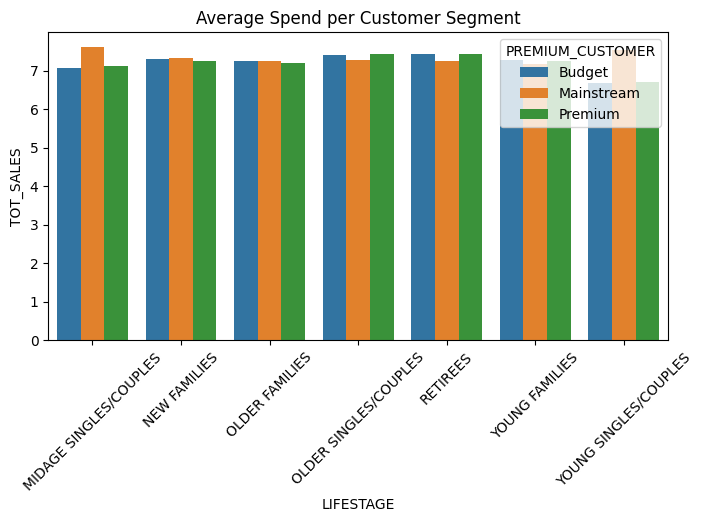

In [37]:
avg_spend = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=avg_spend, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.title("Average Spend per Customer Segment")
plt.show()


##Insights:

1. Highest Spending Segment
Midage Singles/Couples (Mainstream category) have the highest average spend among all customer segments.
This suggests that mid-aged consumers in the mainstream category are willing to spend more compared to others.
2. Spending Patterns Across Lifestages
Retirees, Older Singles/Couples, and Older Families have relatively high spending across all customer segments.
Young Singles/Couples and Young Families have slightly lower spending compared to other groups.
3. Budget vs. Premium Customers
Spending levels across Budget, Mainstream, and Premium customers are generally close for most lifestages.
Premium customers do not always have the highest spend, indicating that even budget-conscious customers contribute significantly to sales.



# Business Insights & Recommendations

For Kettle: Maintain market leadership with brand loyalty programs or premium product lines. For Mid-Tier Brands: Compete aggressively with marketing campaigns and new flavors. For Lower-Tier Brands: Target niche markets with unique flavors, healthier options, or regional marketing.

1.Optimize Pack Sizes:
Stock More 175g and 150g Packs: Since they have the highest sales.
Promote Smaller and Larger Packs: Offer discounts or bundle deals to boost sales of low-selling sizes.
Analyze Customer Preferences Further: Determine why certain sizes are less popular—is it pricing, availability, or demand?

2.Target High-Spending Customers: Prioritize Midage Singles/Couples, Retirees, and Older Couples with tailored marketing strategies.

3.Increase Sales in Young Segments: Create budget-friendly options, promotions, and loyalty programs to encourage more spending among young families and singles.

4. Balanced Strategy for Budget/Mainstream/Premium: Since all three categories spend similarly, ensure that marketing strategies target a broad audience rather than focusing only on premium customers.